# **White noise**

If a time series is white noise, it is a sequence of random numbers and cannot be predicted. 


A time series is white noise if the variables are independent and identically distributed with a mean of zero.

This means that all variables have the same variance (sigma^2) and each value has a zero correlation with all other values in the series.


If the series of forecast errors are not white noise, it suggests improvements could be made to the predictive model.

In [1]:
# create and plot a random series
from random import gauss
from random import seed
from pandas import Series
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
import pandas as pd 
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.read_csv("/content/AirQuality_1.csv",index_col=0, parse_dates=True)

series = Series(df['S1'])


In [3]:
df.head()

,S1,S2,S3,S4,S5
Date,,,,,
2004-03-10,1360.0,1360.0,1056.0,1692.0,1268.0
2004-03-10,1292.0,1292.0,1174.0,1559.0,972.0
2004-03-10,1402.0,1402.0,1140.0,1554.0,1074.0
2004-03-10,1376.0,1376.0,1092.0,1584.0,1203.0
2004-03-10,1272.0,1272.0,1205.0,1490.0,1110.0


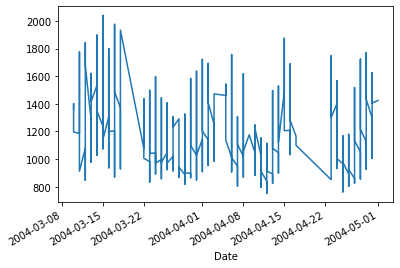

In [4]:
seed(1)
#series=[gauss(0.0,1.0) for i in range(1000)]
#White noise are variations in your data that cannot be explained by any regression model.
series=Series(series)
series.plot()
pyplot.show()

In [5]:
print(series.describe())

count     827.000000
mean     1207.737606
std       241.842734
min       752.000000
25%      1017.000000
50%      1172.000000
75%      1380.000000
max      2040.000000
Name: S1, dtype: float64


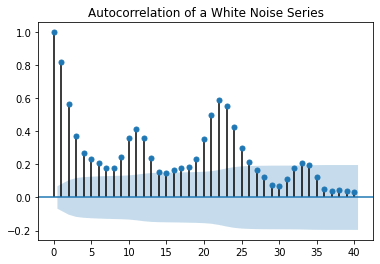

In [6]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plot_acf(series, lags=40)

pyplot.title("Autocorrelation of a White Noise Series")
pyplot.show()
#autocorlation is above confidential intreval so it is not white noise

For white noise series, we expect each autocorrelation to be close to zero. Of course, they will not be exactly equal to zero as there is some random variation

Time series data that shows no auto correlation is called white noise.

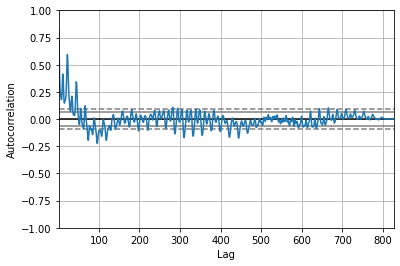

In [7]:
autocorrelation_plot(series)
pyplot.show()

We can also create a histogram and confirm the distribution is not Gaussian. the histogram doesn't shows the tell-tale bell-curve shape.it is positively skewed

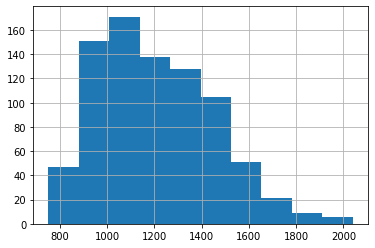

In [8]:
series.hist()
pyplot.show()

## **Random walk**

Unlike white noise, it has non-zero mean, non-constant std/variance, and when plotted, looks a lot like a regular distribution:

random walk, each step is dependent on the previous step.
For this reason, the Autocorrelation function of random walks does return non-zero correlations.

In [9]:
df = pd.read_csv("/content/AirQuality_1.csv",index_col=0, parse_dates=True)
df.head()

,S1,S2,S3,S4,S5
Date,,,,,
2004-03-10,1360.0,1360.0,1056.0,1692.0,1268.0
2004-03-10,1292.0,1292.0,1174.0,1559.0,972.0
2004-03-10,1402.0,1402.0,1140.0,1554.0,1074.0
2004-03-10,1376.0,1376.0,1092.0,1584.0,1203.0
2004-03-10,1272.0,1272.0,1205.0,1490.0,1110.0


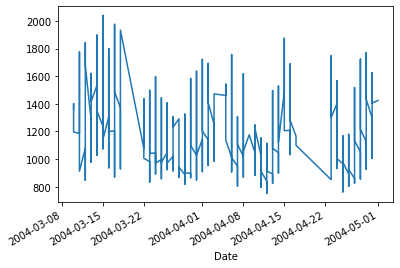

In [10]:
series = Series(df['S1'])
series.plot()
pyplot.show()

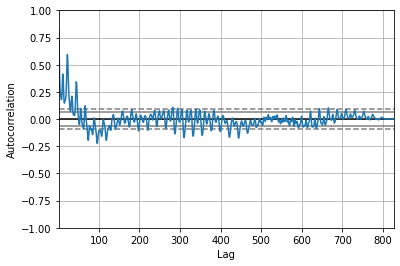

In [11]:
random_walk = df['S1']
autocorrelation_plot(random_walk)
pyplot.show()

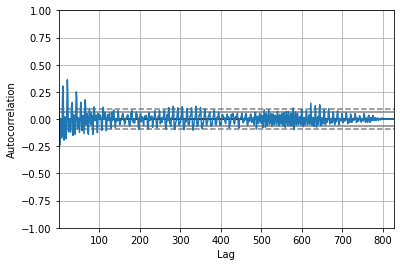

In [12]:
# plot the autocorrelation of a differenced random walk
# create random walk
random_walk = df['S1']
# take difference
diff = list()
for i in range(1, len(random_walk)):
	value = random_walk[i] - random_walk[i - 1]
	diff.append(value)
# line plot
autocorrelation_plot(diff)
pyplot.show()

If you plot the first-order difference of a time series and the result is white noise, then it is a random walk.

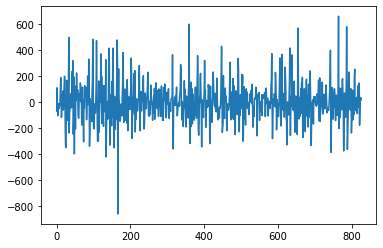

In [13]:
# calculate and plot a differenced random walk
# create random walk
random_walk = Series(df['S1'])
# take difference
diff = list()
for i in range(1, len(random_walk)):
	value = random_walk[i] - random_walk[i - 1]
	diff.append(value)
# line plot
pyplot.plot(diff)
pyplot.show()

In [14]:
# persistence forecasts for a random walk
# generate the random walk
random_walk = df['S1']
# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]
# persistence
predictions = list()
history = train[-1]
for i in range(len(test)):
	yhat = history
	predictions.append(yhat)
	history = test[i]
rmse = sqrt(mean_squared_error(test, predictions))
print('Persistence RMSE: %.3f' % rmse)

Persistence RMSE: 140.987
